In [2]:
from math import radians, cos, sin, asin, sqrt

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)
sns.set_theme(style="darkgrid",palette=sns.color_palette("Set2"))

import warnings
warnings.filterwarnings("ignore")

In [9]:
df_assets_down=pd.read_csv("writedown.csv")
df_assets_down.head(6)

,INSTN_NAME,PPTY_KEY,PPTY_NAME,ELECTED_REIT_STATUS,2020Y,2019Y,2018Y,2017Y,2016Y,2015Y,2014Y,2013Y,2012Y,2011Y,2010Y,2009Y,2008Y,2007Y,2006Y,2005Y,2004Y,2003Y,2002Y,2001Y,2000Y,1999Y,1998Y,1997Y,1996Y,1995Y
0,Acadia Realty Trust,7283,Crescent Plaza,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Acadia Realty Trust,7292,Mark Plaza,Yes,0.0,0.0,0.0,0.0,0.0,0.0,872.0,872.0,872.0,872.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Acadia Realty Trust,7297,New Loudon Center,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Acadia Realty Trust,7305,Plaza 422,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Acadia Realty Trust,21685,Route 6 Mall,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Acadia Realty Trust,32938,Crossroads Shopping Center,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_assets_down_values=df_assets_down[['PPTY_KEY',
                             '2020Y',
       '2019Y', '2018Y', '2017Y', '2016Y', '2015Y', '2014Y', '2013Y', '2012Y',
       '2011Y', '2010Y', '2009Y', '2008Y', '2007Y', '2006Y', '2005Y', '2004Y',
       '2003Y', '2002Y', '2001Y', '2000Y', '1999Y', '1998Y', '1997Y', '1996Y',
       '1995Y']].copy()
df_assets_down_values=df_assets_down_values.set_index("PPTY_KEY").stack().reset_index()
df_assets_down_values.columns=["pptyKey","year","value"]
df_assets_down_values["year"]=df_assets_down_values["year"].str[:-1].astype(int)
df_assets_down_values.head()

,pptyKey,year,value
0,7283,2020,0.0
1,7283,2019,0.0
2,7283,2018,0.0
3,7283,2017,0.0
4,7283,2016,0.0


In [11]:
df_assets_down_location=df_assets_down[['INSTN_NAME', 'PPTY_KEY', 'PPTY_NAME']].copy()
df_assets_down_location.columns=['InstName', 'pptyKey', 'pptyName']
df_assets_down_location.head()

,InstName,pptyKey,pptyName
0,Acadia Realty Trust,7283,Crescent Plaza
1,Acadia Realty Trust,7292,Mark Plaza
2,Acadia Realty Trust,7297,New Loudon Center
3,Acadia Realty Trust,7305,Plaza 422
4,Acadia Realty Trust,21685,Route 6 Mall


In [12]:


df_assets_down=pd.merge(df_assets_down_location,df_assets_down_values,on="pptyKey")
df_assets_down.head()

,InstName,pptyKey,pptyName,year,value
0,Acadia Realty Trust,7283,Crescent Plaza,2020,0.0
1,Acadia Realty Trust,7283,Crescent Plaza,2019,0.0
2,Acadia Realty Trust,7283,Crescent Plaza,2018,0.0
3,Acadia Realty Trust,7283,Crescent Plaza,2017,0.0
4,Acadia Realty Trust,7283,Crescent Plaza,2016,0.0


In [13]:


df_company_asset_down=df_assets_down.groupby(["InstName","year"])["value"].sum().reset_index()

df_company_asset_down.columns=["InstName","year","writedown_value"]
df_company_asset_down=df_company_asset_down[df_company_asset_down["year"]<=2020]

df_company_asset_down=df_company_asset_down.sort_values(by=["InstName","year"])
df_company_asset_down.head()

,InstName,year,writedown_value
0,Acadia Realty Trust,1995,0.0
1,Acadia Realty Trust,1996,0.0
2,Acadia Realty Trust,1997,0.0
3,Acadia Realty Trust,1998,0.0
4,Acadia Realty Trust,1999,0.0


In [14]:


df_assets_infos=pd.read_csv("df_assets_infos.csv",index_col=[0],low_memory=False)
df_assets_infos.head()

,InstName,pptyKey,pptyName,lat,long,reitStatus,year,value,stormid,surfacewindspeed,latitude,longitude,name
240270,SITE Centers Corp.,5299,University Centre,34.23613,-77.87650,Yes,1995,24341,1995154N17276,NaN,34.5,-78.1,ALLISON
41023,"CBL & Associates Properties, Inc.",4757,Post Oak Mall,30.62456,-96.30314,Yes,1995,45567,1995210N26273,NaN,30.5,-96.5,DEAN
41024,"CBL & Associates Properties, Inc.",4757,Post Oak Mall,30.62456,-96.30314,Yes,1995,45567,1995210N26273,NaN,30.0,-96.0,DEAN
171633,"Mid-America Apartment Communities, Inc.",7152,Cypresswood Court,30.03906,-95.34010,Yes,1995,5926,1995210N26273,NaN,29.5,-95.5,DEAN
171634,"Mid-America Apartment Communities, Inc.",7152,Cypresswood Court,30.03906,-95.34010,Yes,1995,5926,1995210N26273,NaN,30.0,-96.0,DEAN


In [15]:

df_assets_infos["has_storm"]=df_assets_infos["stormid"].map(lambda x: 1 if pd.isnull(x) else 0)
df_assets_infos_unique=df_assets_infos[["InstName","pptyKey","year","value","has_storm"]].drop_duplicates()

df_company_asset=df_assets_infos_unique.groupby(["InstName","year"])['value'].sum().reset_index()
df_company_asset.columns=["InstName","year","asset_value"]
df_company_asset.head()

,InstName,year,asset_value
0,Acadia Realty Trust,1995,35468
1,Acadia Realty Trust,1996,34483
2,Acadia Realty Trust,1997,32928
3,Acadia Realty Trust,1998,166455
4,Acadia Realty Trust,1999,207938


In [16]:


df_company_storm=df_assets_infos.groupby(["InstName","year"]).agg({"stormid":["nunique","count"],
                                                 "surfacewindspeed":"max"}).reset_index().fillna(0)

df_company_storm.columns=["InstName","year","number_of_storm","storm_experience_hour","max_storm_speed"]
df_company_storm.head()

,InstName,year,number_of_storm,storm_experience_hour,max_storm_speed
0,Acadia Realty Trust,1995,0,0,0.0
1,Acadia Realty Trust,1996,1,1,0.0
2,Acadia Realty Trust,1997,0,0,0.0
3,Acadia Realty Trust,1998,0,0,0.0
4,Acadia Realty Trust,1999,2,8,60.0


In [17]:


df_company_asset_storm=pd.merge(df_company_asset,df_company_storm,on=["InstName","year"])
df_company_asset_storm.head()

,InstName,year,asset_value,number_of_storm,storm_experience_hour,max_storm_speed
0,Acadia Realty Trust,1995,35468,0,0,0.0
1,Acadia Realty Trust,1996,34483,1,1,0.0
2,Acadia Realty Trust,1997,32928,0,0,0.0
3,Acadia Realty Trust,1998,166455,0,0,0.0
4,Acadia Realty Trust,1999,207938,2,8,60.0


#data merging

In [18]:
df_inflation=pd.read_csv("inflation rate.csv")
df_inflation=df_inflation[["year","Ave"]]
df_inflation.columns=["year","inflation_rate"]
df_inflation.head()

,year,inflation_rate
0,2021,NaN
1,2020,1.2
2,2019,1.8
3,2018,2.4
4,2017,2.1


In [19]:
df_company_asset_down=pd.merge(df_company_asset_down,df_inflation,on=["year"])
df_company_asset_down.head()

,InstName,year,writedown_value,inflation_rate
0,Acadia Realty Trust,1995,0.0,2.17
1,Agree Realty Corporation,1995,0.0,2.17
2,"Alexander's, Inc.",1995,0.0,2.17
3,Apartment Income REIT Corp.,1995,0.0,2.17
4,"AvalonBay Communities, Inc.",1995,810.0,2.17


In [20]:
df_company_asset_down_model=pd.merge(df_company_asset_down,df_company_asset_storm,on=["InstName","year"])

df_company_asset_down_model["writedown_pct"]=df_company_asset_down_model["writedown_value"]/df_company_asset_down_model["asset_value"]


df_company_asset_down_model.head()

,InstName,year,writedown_value,inflation_rate,asset_value,number_of_storm,storm_experience_hour,max_storm_speed,writedown_pct
0,Acadia Realty Trust,1995,0.0,2.17,35468,0,0,0.0,0.000000
1,Agree Realty Corporation,1995,0.0,2.17,12500,2,2,0.0,0.000000
2,"Alexander's, Inc.",1995,0.0,2.17,45094,0,0,0.0,0.000000
3,Apartment Income REIT Corp.,1995,0.0,2.17,18935,0,0,0.0,0.000000
4,"AvalonBay Communities, Inc.",1995,810.0,2.17,167279,0,0,0.0,0.004842


In [21]:
df_company_asset_down_model.to_csv("df_company_asset_down_model.csv")

In [8]:

df_top5=pd.read_csv("top5.csv")
df_top5.head()

,Unnamed: 0,InstName,year,writedown_value,inflation_rate,asset_value,number_of_storm,storm_experience_hour,max_storm_speed,writedown_pct
0,2397,Agree Realty Corporation,2020,23971,1.2,3297509,11,777,130,0.007269
1,1854,Agree Realty Corporation,2017,5978,2.1,1055812,6,83,120,0.005662
2,1682,Agree Realty Corporation,2016,11595,1.3,784700,5,27,35,0.014776
3,547,Agree Realty Corporation,2005,234,3.4,88373,4,30,60,0.002648
4,2035,Agree Realty Corporation,2018,14662,2.4,1569650,4,259,135,0.009341


In [9]:
df_top5=df_top5[df_top5["writedown_value"]>0]
df_top5.head()


,Unnamed: 0,InstName,year,writedown_value,inflation_rate,asset_value,number_of_storm,storm_experience_hour,max_storm_speed,writedown_pct
0,2397,Agree Realty Corporation,2020,23971,1.2,3297509,11,777,130,0.007269
1,1854,Agree Realty Corporation,2017,5978,2.1,1055812,6,83,120,0.005662
2,1682,Agree Realty Corporation,2016,11595,1.3,784700,5,27,35,0.014776
3,547,Agree Realty Corporation,2005,234,3.4,88373,4,30,60,0.002648
4,2035,Agree Realty Corporation,2018,14662,2.4,1569650,4,259,135,0.009341


In [10]:
df_top5

,Unnamed: 0,InstName,year,writedown_value,inflation_rate,asset_value,number_of_storm,storm_experience_hour,max_storm_speed,writedown_pct
0,2397,Agree Realty Corporation,2020,23971,1.20,3297509,11,777,130,0.007269
1,1854,Agree Realty Corporation,2017,5978,2.10,1055812,6,83,120,0.005662
2,1682,Agree Realty Corporation,2016,11595,1.30,784700,5,27,35,0.014776
3,547,Agree Realty Corporation,2005,234,3.40,88373,4,30,60,0.002648
4,2035,Agree Realty Corporation,2018,14662,2.40,1569650,4,259,135,0.009341
5,2213,Agree Realty Corporation,2019,18689,1.80,2179678,4,179,60,0.008574
6,1126,Agree Realty Corporation,2012,5319,2.10,241570,3,12,35,0.022018
8,476,Agree Realty Corporation,2004,207,2.70,81392,2,6,95,0.002543
9,771,Agree Realty Corporation,2008,391,3.80,107978,2,22,0,0.003621
10,1522,Agree Realty Corporation,2015,6000,0.10,553026,2,8,0,0.010849


In [5]:
df_top5=df_top5[df_top5["year"]==2020]
df_top5.head()

,Unnamed: 0,InstName,year,writedown_value,inflation_rate,asset_value,number_of_storm,storm_experience_hour,max_storm_speed,writedown_pct
0,2397,Agree Realty Corporation,2020,23971,1.2,3297509,11,777,130,0.007269
26,2402,"American Finance Trust, Inc.",2020,17347,1.2,3095744,11,757,130,0.005603
34,2449,EPR Properties,2020,125279,1.2,4851302,11,208,100,0.025824
58,2457,"Essential Properties Realty Trust, Inc.",2020,7959,1.2,2148772,11,825,130,0.003704
62,2463,"Four Corners Property Trust, Inc.",2020,1649,1.2,1362578,11,442,130,0.001210


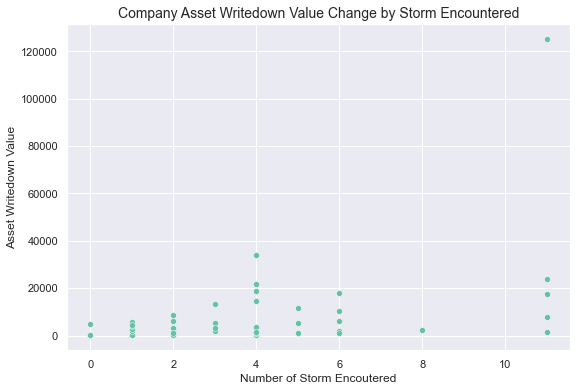

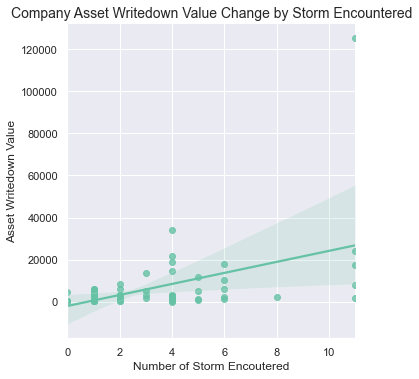

In [11]:
# plot  资产增长率 vs storm 数量

plt.figure(figsize=(9,6))
sns.scatterplot(y="writedown_value",x="number_of_storm",data=df_top5)
# plt.ylim(-1,5)
plt.xlabel("Number of Storm Encoutered",fontsize=12)
plt.ylabel("Asset Writedown Value",fontsize=12)
plt.title("Company Asset Writedown Value Change by Storm Encountered",fontsize=14)
plt.show()


sns.lmplot(y="writedown_value",x="number_of_storm",data=df_top5)
# plt.ylim(-1,5)
plt.xlabel("Number of Storm Encoutered",fontsize=12)
plt.ylabel("Asset Writedown Value",fontsize=12)
plt.title("Company Asset Writedown Value Change by Storm Encountered",fontsize=14)
plt.show()

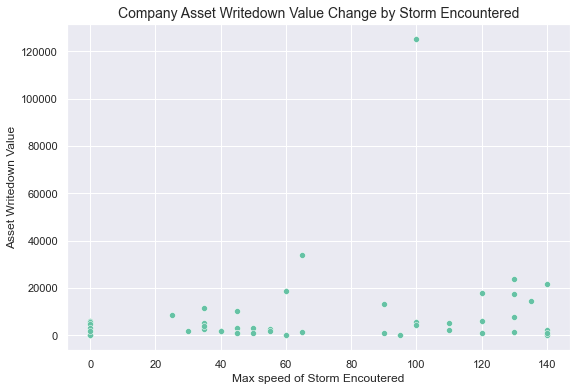

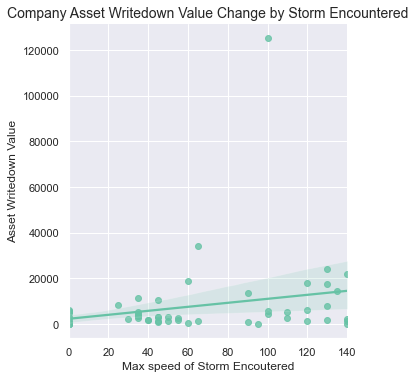

In [12]:
# plot  资产增长率 vs storm 数量

plt.figure(figsize=(9,6))
sns.scatterplot(y="writedown_value",x="max_storm_speed",data=df_top5)
# plt.ylim(-1,5)
plt.xlabel("Max speed of Storm Encoutered",fontsize=12)
plt.ylabel("Asset Writedown Value",fontsize=12)
plt.title("Company Asset Writedown Value Change by Storm Encountered",fontsize=14)
plt.show()


sns.lmplot(y="writedown_value",x="max_storm_speed",data=df_top5)
# plt.ylim(-1,5)
plt.xlabel("Max speed of Storm Encoutered",fontsize=12)
plt.ylabel("Asset Writedown Value",fontsize=12)
plt.title("Company Asset Writedown Value Change by Storm Encountered",fontsize=14)
plt.show()

In [33]:
df_company_asset_down_model=pd.read_csv("df_company_asset_down_model.csv")

In [34]:
df_company_asset_down_model.head()

,Unnamed: 0,InstName,year,writedown_value,inflation_rate,asset_value,number_of_storm,storm_experience_hour,max_storm_speed,writedown_pct,whether_writedown,category
0,0,Acadia Realty Trust,1995,0,2.17,35468,0,0,0,0.000000,0,0
1,1,Agree Realty Corporation,1995,0,2.17,12500,2,2,0,0.000000,0,0
2,2,"Alexander's, Inc.",1995,0,2.17,45094,0,0,0,0.000000,0,0
3,3,Apartment Income REIT Corp.,1995,0,2.17,18935,0,0,0,0.000000,0,0
4,4,"AvalonBay Communities, Inc.",1995,810,2.17,167279,0,0,0,0.004842,1,0


In [35]:

df_company_asset_down_model=df_company_asset_down_model[df_company_asset_down_model["number_of_storm"]>0]


df_company_asset_down_model=df_company_asset_down_model[df_company_asset_down_model["storm_experience_hour"]<200]
df_company_asset_down_model.shape


(1188, 12)

In [ ]:

df_company_asset_down_model["writedown_pct"]=np.log(df_company_asset_down_model["writedown_pct"])
df_company_asset_down_model["writedown_value"]=np.log(df_company_asset_down_model["writedown_value"])


In [36]:
df_company_asset_down_model.head()

,Unnamed: 0,InstName,year,writedown_value,inflation_rate,asset_value,number_of_storm,storm_experience_hour,max_storm_speed,writedown_pct,whether_writedown,category
1,1,Agree Realty Corporation,1995,0,2.17,12500,2,2,0,0.0,0,0
6,6,"CBL & Associates Properties, Inc.",1995,0,2.17,304117,2,5,0,0.0,0,0
7,7,Camden Property Trust,1995,0,2.17,57839,1,1,30,0.0,0,0
9,9,"EastGroup Properties, Inc.",1995,0,2.17,40307,2,6,0,0.0,0,0
10,10,"Equity LifeStyle Properties, Inc.",1995,0,2.17,441930,2,17,30,0.0,0,0


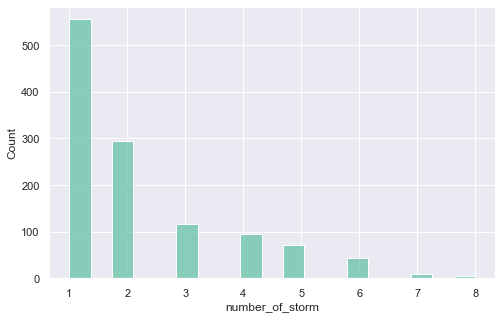

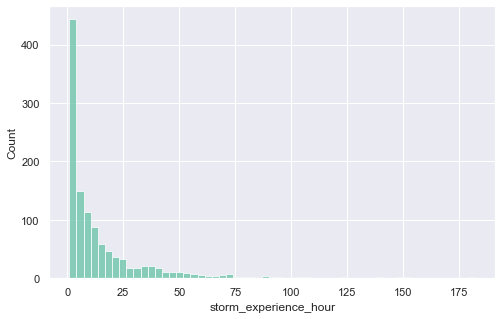

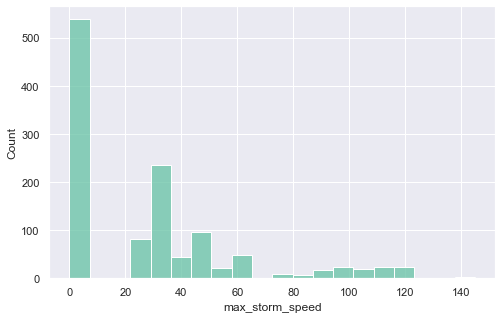

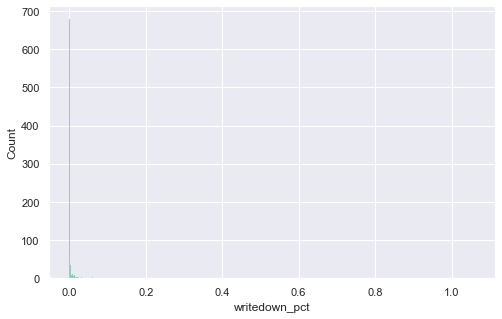

In [37]:
for col in [ 'number_of_storm', 'storm_experience_hour', 'max_storm_speed','writedown_pct']:
    plt.figure(figsize=(8,5))
    sns.histplot(x=col,data=df_company_asset_down_model)
    plt.show()

,inflation_rate,number_of_storm,storm_experience_hour,max_storm_speed,writedown_pct,writedown_value,whether_writedown
inflation_rate,1.000000,0.116763,0.041575,0.079406,-0.026721,-0.042741,-0.026032
number_of_storm,0.116763,1.000000,0.571214,0.568140,0.038066,0.063083,0.102565
storm_experience_hour,0.041575,0.571214,1.000000,0.409850,0.029860,0.036664,0.210570
max_storm_speed,0.079406,0.568140,0.409850,1.000000,0.039663,0.073774,0.136778
writedown_pct,-0.026721,0.038066,0.029860,0.039663,1.000000,0.925158,0.137518
writedown_value,-0.042741,0.063083,0.036664,0.073774,0.925158,1.000000,0.085991
whether_writedown,-0.026032,0.102565,0.210570,0.136778,0.137518,0.085991,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

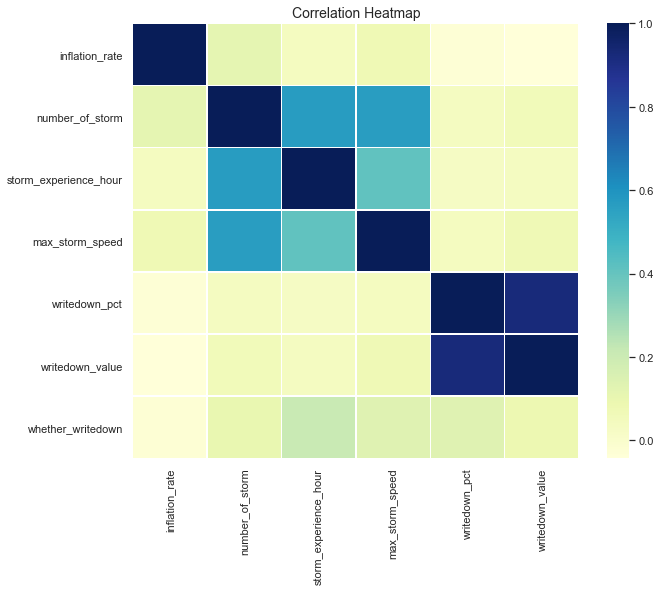

In [39]:
df_corr=df_company_asset_down_model[[ 'inflation_rate','number_of_storm', 'storm_experience_hour', 'max_storm_speed','writedown_pct','writedown_value',"whether_writedown"]].corr()

display(df_corr)

plt.figure(figsize=(10,8))

sns.heatmap(df_corr.iloc[:30,:-1], cmap="YlGnBu",linewidths=.5)
plt.title("Correlation Heatmap",fontsize=14)

In [13]:

from sklearn.linear_model import LogisticRegression as LR
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [16]:

x = df_company_asset_down_model.loc[:, [ 'inflation_rate','number_of_storm', 'storm_experience_hour', 'max_storm_speed']]
y = df_company_asset_down_model.whether_writedown
print(x.shape , y.shape)
scaler = StandardScaler() 
scaler.fit(x) 
x = scaler.transform(x) 

(2034, 4) (2034,)


In [17]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=0.3,random_state=0)

特征选择前： 0.6120260021668471 0.51
特征选择后 0.601511868413277 0.01


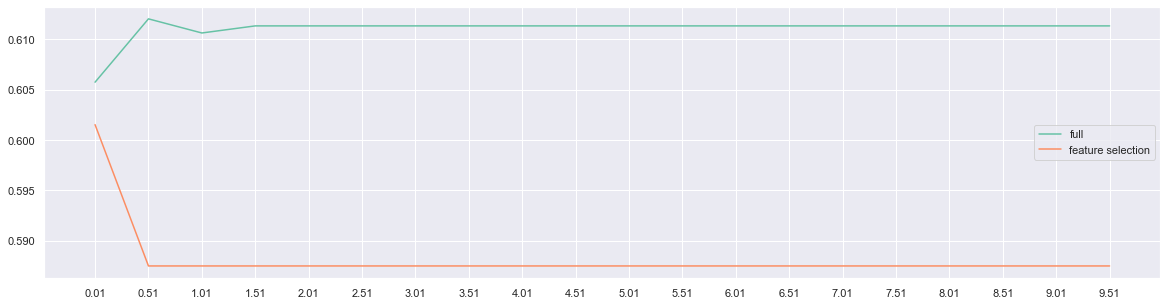

(1423, 1)


In [18]:
fullx = []
fsx = []

C = np.arange(0.01,10.01,0.5)
for i in C:
    LR_ = LR(penalty='l2',solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,xtrain,ytrain,cv=10).mean())
    x_embedded = SelectFromModel(LR_,norm_order=1).fit(xtrain,ytrain)
    x_embedded_train = x_embedded.transform(xtrain)
    fsx.append(cross_val_score(LR_,x_embedded_train,ytrain,cv=10).mean())

print('特征选择前：',max(fullx),C[fullx.index(max(fullx))]) 
print('特征选择后',max(fsx),C[fsx.index(max(fsx))])      
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()
print(x_embedded_train.shape) 

In [19]:
LR_selection = LR(penalty='l2',solver='liblinear',C=0.51,random_state=420)
x_embedded = SelectFromModel(LR_selection,norm_order=1).fit(xtrain,ytrain)
x_embedded_train = x_embedded.transform(xtrain)
LR_selection.fit(x_embedded_train,ytrain)
print(x_embedded_train.shape)   
print(cross_val_score(LR_selection,x_embedded_train,ytrain,cv=10).mean())   
print(x_embedded.get_support())
print(classification_report(ytrain,LR_selection.predict(x_embedded_train))) 


(1423, 1)
0.5874716832463311
[False False  True False]
              precision    recall  f1-score   support

           0       0.54      0.70      0.61       655
           1       0.66      0.49      0.57       768

    accuracy                           0.59      1423
   macro avg       0.60      0.60      0.59      1423
weighted avg       0.61      0.59      0.59      1423



In [20]:
x_embedded_test = x_embedded.transform(xtest)
print('The accuracy of logistic regression is',cross_val_score(LR_selection,x_embedded_test,ytest,cv=10).mean())   
print(x_embedded_test.shape)    
print(classification_report(ytest,LR_selection.predict(x_embedded_test)))


The accuracy of logistic regression is 0.5729243786356426
(611, 1)
              precision    recall  f1-score   support

           0       0.54      0.72      0.62       275
           1       0.68      0.50      0.58       336

    accuracy                           0.60       611
   macro avg       0.61      0.61      0.60       611
weighted avg       0.62      0.60      0.59       611



In [34]:
#随机森林分类
from sklearn. ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
rfc_y_pred = rfc.predict(xtest)


In [37]:
from sklearn.metrics import classification_report
print('The accuracy of random forest classifier is', rfc.score(xtest, ytest))
print(classification_report(rfc_y_pred, ytest))

The accuracy of random forest classifier is 0.5990180032733224
              precision    recall  f1-score   support

           0       0.49      0.56      0.53       242
           1       0.68      0.62      0.65       369

    accuracy                           0.60       611
   macro avg       0.59      0.59      0.59       611
weighted avg       0.61      0.60      0.60       611



In [50]:
#random forest
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [180]:
df_company_asset_down_model=pd.read_csv("df_company_asset_down_model.csv")
df_company_asset_down_model.head()

,Unnamed: 0,InstName,year,writedown_value,inflation_rate,asset_value,number_of_storm,storm_experience_hour,max_storm_speed,writedown_pct
0,0,Acadia Realty Trust,1995,0.0,2.17,35468,0,0,0.0,0.000000
1,1,Agree Realty Corporation,1995,0.0,2.17,12500,2,2,0.0,0.000000
2,2,"Alexander's, Inc.",1995,0.0,2.17,45094,0,0,0.0,0.000000
3,3,Apartment Income REIT Corp.,1995,0.0,2.17,18935,0,0,0.0,0.000000
4,4,"AvalonBay Communities, Inc.",1995,810.0,2.17,167279,0,0,0.0,0.004842


In [158]:
x = df_company_asset_down_model.loc[:, [ 'inflation_rate','number_of_storm', 'storm_experience_hour', 'max_storm_speed']]
y = df_company_asset_down_model.writedown_value

In [117]:

regressor = RandomForestRegressor(n_estimators=100,random_state=0)
cross_val_score(regressor, x, y, cv=10,scoring = 'neg_mean_absolute_percentage_error')

array([-5.17222014e+19, -3.20238157e+19, -1.23329219e+19, -3.08586689e+19,
       -2.07574387e+19, -1.49284042e+19, -3.67824028e+19, -2.70442196e+19,
       -2.51931800e+19, -7.92722005e+19])

In [28]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [181]:

df_company_asset_down_model=df_company_asset_down_model[df_company_asset_down_model["number_of_storm"]>0]


df_company_asset_down_model=df_company_asset_down_model[df_company_asset_down_model["writedown_value"]>0]


df_company_asset_down_model=df_company_asset_down_model[df_company_asset_down_model["storm_experience_hour"]<200]


df_company_asset_down_model["writedown_pct"]=np.log(df_company_asset_down_model["writedown_pct"])
df_company_asset_down_model["writedown_value"]=np.log(df_company_asset_down_model["writedown_value"])
df_company_asset_down_model.shape

(989, 10)

In [186]:
df_company_asset_down_model.head(4)

,Unnamed: 0,InstName,year,writedown_value,inflation_rate,asset_value,number_of_storm,storm_experience_hour,max_storm_speed,writedown_pct
45,45,Brookfield Property REIT Inc.,1996,4.875197,2.17,628887,1,1,0.0,-8.476510
52,52,Federal Realty Investment Trust,1996,7.579679,2.17,684802,2,14,0.0,-5.857206
60,60,Macerich Company,1996,1.945910,2.17,414589,1,1,0.0,-10.989133
67,67,Pennsylvania Real Estate Investment Trust,1996,6.639876,2.17,98970,1,1,0.0,-4.862696


In [160]:
x = df_company_asset_down_model.loc[:, [ 'inflation_rate','number_of_storm', 'storm_experience_hour', 'max_storm_speed']]
y = df_company_asset_down_model.writedown_value

In [120]:

regressor = RandomForestRegressor(n_estimators=100,random_state=0)
cross_val_score(regressor, x, y, cv=10,scoring = 'neg_mean_absolute_percentage_error')

array([-9.88288655e+14, -3.75237825e-01, -6.44646680e+14, -4.36381422e+14,
       -1.46171134e+15, -6.19886410e-01, -7.79465259e+14, -4.03107262e+14,
       -3.62387873e+14, -7.10676415e+14])

In [161]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5900) 

In [162]:
from sklearn import ensemble
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=800)

In [126]:
regressor.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [165]:
def regression_method(model):
    model.fit(x_train,y_train)
    score = model.score(x_test, y_test)
    result = model.predict(x_test)
    ResidualSquare = (result - y_test)**2   
    RSS = sum(ResidualSquare)   
    MSE = np.mean(ResidualSquare)      
    num_regress = len(result)   
    print(f'n={num_regress}')
    print(f'R^2={score}')
    print(f'MSE={MSE}')
    print(f'RSS={RSS}')
    plt.figure()
    plt.plot(np.arange(len(result)), y_test,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
    plt.title('RandomForestRegression ')
    plt.legend()        
    plt.show()
    return result


In [166]:
def scatter_plot(TureValues,PredictValues):
    xxx = [-0.5,1.5]
    yyy = [-0.5,1.5]
    plt.figure()
    plt.plot(xxx , yyy , c='0' , linewidth=1 , linestyle=':' , marker='.' , alpha=0.3)#绘制虚线
    plt.scatter(TureValues , PredictValues , s=20 , c='r' , edgecolors='k' , marker='o' , alpha=0.8)
    plt.xlim((0,1))  
    plt.ylim((0,1))
    plt.title('RandomForestRegressionScatterPlot')
    plt.show()


n=198
R^2=-0.1128118770415647
MSE=9.37463843592048
RSS=1856.1784103122548


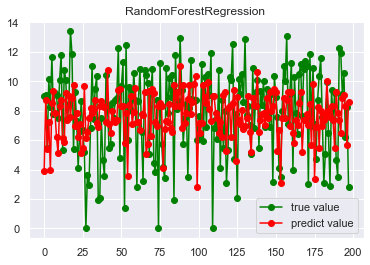

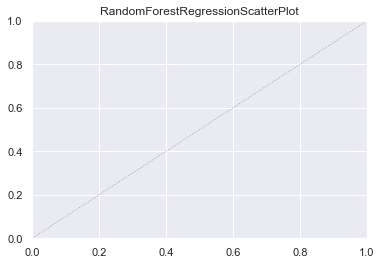

In [167]:
y_pred = regression_method(model_RandomForestRegressor)       
scatter_plot(y_test,y_pred)

In [179]:

predictions = regressor.predict(x_test)
 
# Calculate the absolute errors
errors = abs(predictions - y_test)
 
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 5), 'degrees.')

mape = 100 * (errors / y_test)
 
# Calculate and display accuracy
accuracy = 100 - 58.889768 #from following mean value
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 2.50257 degrees.
Accuracy: 41.11 %.


In [173]:
mape

190      58.889768
1895      1.445081
2173      4.039803
1176     26.669794
556      54.674228
           ...    
2233      2.858527
2561     17.704831
577      30.386718
689      31.363963
2426    196.959048
Name: writedown_value, Length: 198, dtype: float64

In [177]:
mape.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 190      58.889768
1895      1.445081
2173      4.039803
1176     26.669794
556      54.674228
           ...    
2233      2.858527
2561     17.704831
577      30.386718
689      31.363963
2426    196.959048
Name: writedown_value, Length: 198, dtype: float64>

In [135]:
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

n=198
R^2=-0.11952203623608515
MSE=9.431166693385999
RSS=1867.3710052904278


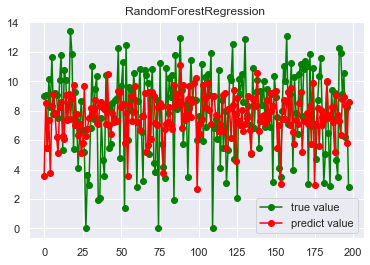

In [146]:
y_pred = regression_method(model_RandomForestRegressor)

In [148]:
#top5
df_company_asset_down_model=pd.read_csv("top5companies.csv")
df_company_asset_down_model.head()

,Unnamed: 0,InstName,year,writedown_value,inflation_rate,asset_value,number_of_storm,storm_experience_hour,max_storm_speed,writedown_pct
0,1800.0,Park Hotels & Resorts Inc.,2016.0,97000.0,1.3,7852000.0,1.0,3.0,0.0,0.012354
1,1978.0,Park Hotels & Resorts Inc.,2017.0,106000.0,2.1,7638000.0,2.0,8.0,145.0,0.013878
2,2156.0,Park Hotels & Resorts Inc.,2018.0,99000.0,2.4,7556000.0,0.0,0.0,0.0,0.013102
3,2341.0,Park Hotels & Resorts Inc.,2019.0,166000.0,1.8,8964000.0,1.0,4.0,45.0,0.018519
4,2528.0,Park Hotels & Resorts Inc.,2020.0,260000.0,1.2,8666000.0,5.0,15.0,85.0,0.030002


,inflation_rate,number_of_storm,storm_experience_hour,max_storm_speed,writedown_pct,writedown_value
inflation_rate,1.000000,0.107280,-0.079212,0.229240,-0.175764,-0.193544
number_of_storm,0.107280,1.000000,0.627944,0.486050,0.067650,0.074269
storm_experience_hour,-0.079212,0.627944,1.000000,0.305433,-0.055441,-0.044925
max_storm_speed,0.229240,0.486050,0.305433,1.000000,0.043671,0.035960
writedown_pct,-0.175764,0.067650,-0.055441,0.043671,1.000000,0.998534
writedown_value,-0.193544,0.074269,-0.044925,0.035960,0.998534,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

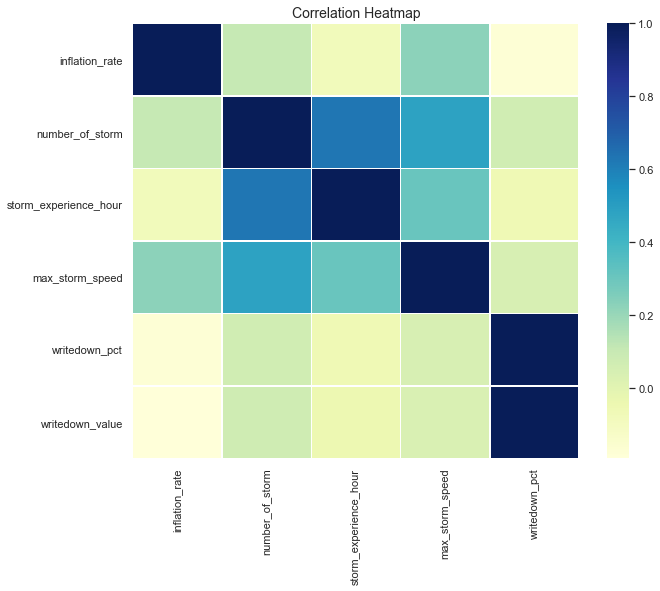

In [75]:
df_corr=df_company_asset_down_model[[ 'inflation_rate','number_of_storm', 'storm_experience_hour', 'max_storm_speed','writedown_pct','writedown_value']].corr()

display(df_corr)

plt.figure(figsize=(10,8))

sns.heatmap(df_corr.iloc[:30,:-1], cmap="YlGnBu",linewidths=.5)
plt.title("Correlation Heatmap",fontsize=14)

## y= writedown_value

In [76]:
x=sm.add_constant(df_company_asset_down_model[['inflation_rate','number_of_storm', 'storm_experience_hour', 'max_storm_speed']].fillna(0))
y=df_company_asset_down_model['writedown_value']
regr=sm.OLS(y,x)
res=regr.fit()

res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Ordinary least squares
=========================================================================================
Model:                      OLS                     Adj. R-squared:            -0.014    
Dependent Variable:         writedown_value         AIC:                       1398.8205 
Date:                       2021-11-29 19:47        BIC:                       1408.0712 
No. Observations:           47                      Log-Likelihood:            -694.41   
Df Model:                   4                       F-statistic:               0.8416    
Df Residuals:               42                      Prob (F-statistic):        0.507     
R-squared:                  0.074                   Scale:                     4.4617e+11
-----------------------------------------------------------------------------------------
                         Coef.       Std.Err.      t    P>|t|      [0.025       0.975]   
-----------------------------------------------------------------------------------------
const                  -62774.4255 1327629.4893 -0.0473 0.9625 -2742039.1983 2616490.3473
inflation_rate        -254742.5284  161493.0750 -1.5774 0.1222  -580648.7473   71163.6905
number_of_storm         83439.5650   85024.3127  0.9814 0.3320   -88146.4443  255025.5743
storm_experience_hour   -2902.7738    2680.8763 -1.0828 0.2851    -8313.0013    2507.4537
max_storm_speed          5436.4647   16638.3018  0.3267 0.7455   -28140.9876   39013.9170
-----------------------------------------------------------------------------------------
Omnibus:                      98.446              Durbin-Watson:                 2.221   
Prob(Omnibus):                0.000               Jarque-Bera (JB):              2799.662
Skew:                         5.907               Prob(JB):                      0.000   
Kurtosis:                     38.917              Condition No.:                 1424    
=========================================================================================
* The condition number is large (1e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [77]:
x=sm.add_constant(df_company_asset_down_model[['inflation_rate', 'max_storm_speed']].fillna(0))
y=df_company_asset_down_model['writedown_value']
regr=sm.OLS(y,x)
res=regr.fit()

res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.001     
Dependent Variable:       writedown_value       AIC:                     1396.3162 
Date:                     2021-11-29 19:47      BIC:                     1401.8666 
No. Observations:         47                    Log-Likelihood:          -695.16   
Df Model:                 2                     F-statistic:             1.019     
Df Residuals:             44                    Prob (F-statistic):      0.369     
R-squared:                0.044                 Scale:                   4.3966e+11
-----------------------------------------------------------------------------------
                   Coef.       Std.Err.      t    P>|t|      [0.025       0.975]   
-----------------------------------------------------------------------------------
const           -155362.8529 1252241.3720 -0.1241 0.9018 -2679089.5037 2368363.7978
inflation_rate  -221228.4867  157276.9950 -1.4066 0.1666  -538199.4418   95742.4685
max_storm_speed    8122.5709   14505.9653  0.5599 0.5784   -21112.2811   37357.4230
-----------------------------------------------------------------------------------
Omnibus:                   102.005            Durbin-Watson:               2.149   
Prob(Omnibus):             0.000              Jarque-Bera (JB):            3223.587
Skew:                      6.233              Prob(JB):                    0.000   
Kurtosis:                  41.610             Condition No.:               1148    
===================================================================================
* The condition number is large (1e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

+ 终于 max_storm_speed 显著了 但是 不幸的是影响关系为正 :(

## y= writedown_pct

In [66]:
x=sm.add_constant(df_company_asset_down_model[['inflation_rate','number_of_storm', 'storm_experience_hour', 'max_storm_speed']].fillna(0))
y=df_company_asset_down_model['writedown_pct']
regr=sm.OLS(y,x)
res=regr.fit()

res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:               OLS              Adj. R-squared:     -0.001    
Dependent Variable:  writedown_pct    AIC:                -2198.3527
Date:                2021-11-29 19:40 BIC:                -2175.9678
No. Observations:    650              Log-Likelihood:     1104.2    
Df Model:            4                F-statistic:        0.9122    
Df Residuals:        645              Prob (F-statistic): 0.456     
R-squared:           0.006            Scale:              0.0019741 
--------------------------------------------------------------------
                       Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
--------------------------------------------------------------------
const                  0.0047   0.0050  0.9513 0.3418 -0.0050 0.0145
inflation_rate        -0.0021   0.0018 -1.1873 0.2356 -0.0057 0.0014
number_of_storm        0.0009   0.0013  0.7069 0.4799 -0.0017 0.0036
storm_experience_hour -0.0000   0.0001 -0.2594 0.7954 -0.0001 0.0001
max_storm_speed        0.0001   0.0001  1.1035 0.2702 -0.0001 0.0002
--------------------------------------------------------------------
Omnibus:            1531.919      Durbin-Watson:         2.003      
Prob(Omnibus):      0.000         Jarque-Bera (JB):      6370915.815
Skew:               20.863        Prob(JB):              0.000      
Kurtosis:           486.211       Condition No.:         191        
====================================================================

"""